# Mean Shift Algorithm for Face Recognition

This is an example of implementation of Mean-Shift algorithm for segmentation of images. The algorithms aims at recognizing faces (light pixels) from the background (darker pixels). Mean-Shift algorithm determines the number of clusters and formes the clusters.


## 1. Developing Environment

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, MeanShift

from sklearn import metrics
import matplotlib.pyplot as plt

# Python Imaging Library
from PIL import Image

from scipy.spatial.distance import cdist


## Load data

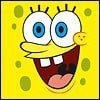

In [2]:
# Read the image file
OUR_IMAGE = './Sponge.jpg'
#OUR_IMAGE = '../images/TechBBQ.jpg'
image = Image.open(OUR_IMAGE)
image

The algorithm expects the data stored into a data frame. Each pixel is presented by two coordinates and three colors in the RGB schema: red, green, and Blue, each measured with a value between 0 and 255.

In [3]:
image.size

(100, 100)

In [4]:
pix_array = np.array(image)
pix_array

array([[[  0,   0,  34],
        [ 48,  47,  42],
        [ 21,   8,   0],
        ...,
        [ 30,   3,   0],
        [ 68,  52,  16],
        [  4,   0,   0]],

       [[ 31,  41,  17],
        [197, 198, 130],
        [229, 219, 104],
        ...,
        [226, 205, 114],
        [207, 196, 134],
        [ 34,  33,   5]],

       [[ 15,  22,   0],
        [230, 230, 100],
        [255, 250,  63],
        ...,
        [255, 247,  99],
        [237, 232, 128],
        [ 16,  16,   0]],

       ...,

       [[ 32,   2,   0],
        [232, 208, 110],
        [255, 249,  96],
        ...,
        [243, 240,  67],
        [232, 221, 115],
        [ 30,  15,   0]],

       [[ 69,  48,  17],
        [207, 191, 132],
        [231, 222, 121],
        ...,
        [235, 224, 109],
        [210, 195, 126],
        [ 50,  34,   9]],

       [[  7,   0,   0],
        [ 44,  37,  21],
        [ 26,  23,   0],
        ...,
        [ 33,  16,   0],
        [ 57,  40,  10],
        [ 13,   0,   0]]

In [5]:
# Alternativ way to get the pixel color values
pixels = image.load()
pixels[20,10]

(160, 175, 32)

In [6]:
# Convert the pixels into pandas dataframe, add the coordinates and the RGB values together
df = pd.DataFrame(
    [[x, y, pixels[x, y][0], pixels[x, y][1], pixels[x, y][2]]
        for x in range(image.size[0])
        for y in range(image.size[1])
     ],
    columns=['x', 'y', 'r', 'g', 'b']
)

In [7]:
df.head()

,x,y,r,g,b
0,0,0,0,0,34
1,0,1,31,41,17
2,0,2,15,22,0
3,0,3,23,20,0
4,0,4,35,22,0


# 3. Training model

In [8]:
# Train mean-shift model with the data frame
imodel = MeanShift()
imodel.fit(df)

MeanShift()

In [9]:
# See the clusters and cluster centers
imodel.cluster_centers_

array([[ 47.66260286,  52.67936605, 240.42852789, 229.11505639,
         23.98963731],
       [ 53.865663  ,  52.29820498,  61.6537348 ,  30.98031268,
         16.91546034]])

In [10]:
len(imodel.cluster_centers_)

2

In [11]:
len(imodel.labels_)

10000

In [12]:
# Create a function to iterate through the data and create clusters
# Remember the variables cluster_centers_ and labels_ from last time?
def image_clusters(model, output, MY_IMAGE):
    # for each cluster
    for i in range(len(model.cluster_centers_)):
        image = Image.open(MY_IMAGE)
        pixels = image.load()
        # for each pixel
        for j in range(len(df)):
            if (model.labels_[j] != i):
                # make the rest white
                pixels[int(df['x'][j]), int(df['y'][j])] = (255, 255, 255)
        image.save(output + str(i) + '.jpg')       

In [13]:
image_clusters(imodel, 'meanshift_cluster', OUR_IMAGE)

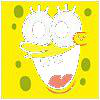

In [14]:
clustered_image0 = Image.open('meanshift_cluster0.jpg')
clustered_image0

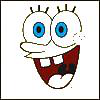

In [15]:
clustered_image1 = Image.open('meanshift_cluster1.jpg')
clustered_image1

# 4 Validating the model with k-means

In [16]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(df)
    model.fit(df)
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [91.20073390767469, 63.89075552395707, 57.31619513554937, 53.874701436671835, 49.799853551744505, 43.38195755421696, 41.33072587761949, 39.36669104815517]


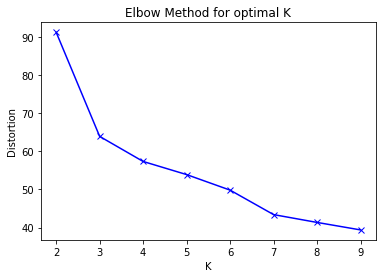

In [17]:
# Plot the elbow
plt.title('Elbow Method for optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [18]:
# K-means model fitting with specified number of clusters
k_means_model = KMeans(n_clusters=7)
k_means_model.fit(df)

KMeans(n_clusters=7)

In [19]:
# Create image clusters
image_clusters(k_means_model, 'kmeans_cluster', OUR_IMAGE)

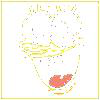

In [20]:
clustered_image0 = Image.open('kmeans_cluster0.jpg')
clustered_image0

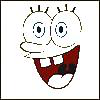

In [21]:
clustered_image1 = Image.open('kmeans_cluster1.jpg')
clustered_image1

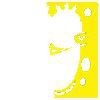

In [22]:
clustered_image2 = Image.open('kmeans_cluster2.jpg')
clustered_image2

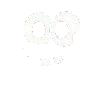

In [23]:
clustered_image3 = Image.open('kmeans_cluster3.jpg')
clustered_image3

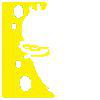

In [24]:
clustered_image4 = Image.open('kmeans_cluster4.jpg')
clustered_image4

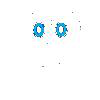

In [25]:
clustered_image5 = Image.open('kmeans_cluster5.jpg')
clustered_image5

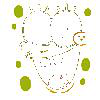

In [26]:
clustered_image6 = Image.open('kmeans_cluster6.jpg')
clustered_image6

In [27]:
#clustered_image7 = Image.open('kmeans_cluster7.jpg')
#clustered_image7